### Merhaba :) Bu çalışmayı Google Play Store da ki uygulamaların Rating'lerini incelemek ve bazı soruları cevaplamak için yaptım. Daha sonra bu çalışmayı Tableau da kullanıcam. Burada; 
###### Hangi kategoriden ne kadar değişken var? 
###### Hangi developerlar bu piyasada çoğunlukta?
###### Free appler yüzdelik dilim olarak ne kadar büyüklükte?
###### Hangi uygulama ne kadar bedava?
###### Kaç tane uygulama in-app purchase sunuyor veya sunmuyor?
### gibi tamamen keyfi sorulara sorarak ilerledim.
### Hi :) I did this study to review the Ratings of applications in the Google Play Store and answer some questions. I will use this study in Tableau later. Here;
### I proceeded by asking completely arbitrary questions such as.
###### How many variables are there from which category?
###### Which developers are the majority in this market?
###### How big are free apps as a percentage slice?
###### How free is which app?
###### How many apps offer in-app purchase or not?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:/Users/myavu/OneDrive/Masaüstü/Veriler/Google-Playstore.csv")
df=data.copy()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-and-conditions/privacy-policy,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UCS548,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [3]:
df.shape, df.columns

((2312944, 24),
 Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
        'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
        'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
        'Developer Email', 'Released', 'Last Updated', 'Content Rating',
        'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
        'Scraped Time'],
       dtype='object'))

In [4]:
df.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

### head() fonksiyonun da gözükmeyen değişkenler için;
### for variables that are not visible in the head() function;
###### pandas.set_option('display.max_columns', None)

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-and-conditions/privacy-policy,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UCS548,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


# Değişken seçimi
# Variable selection

### Rating ve Rating Count:
### df.head()'e göre Rating ve Rating Count değişkenleri birbiriyle bağlantılı. Rating değişkeninin null olduğu yerde Rating Count'da null mu onu öğrenelim. Eğer öyle ise her ikisini de düşürebiliriz.

### Rating and Rating Count:
### According to df.head(), the Rating and Rating Count variables are related to each other. Where the Rating variable is null, let's find out if it is null in the Rating Count. If so, we can drop both.

In [6]:
df[pd.isnull(df["Rating"])]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
115,VM-Delay,com.irv.vm_delay,Tools,NaN,NaN,50+,50.0,71,True,0.0,USD,Varies with device,Varies with device,IVR.RD,NaN,iv_dx@mail.com,NaN,"Oct 23, 2018",Everyone,NaN,False,False,False,2021-06-15 20:19:42
210,Promotor,com.touchesbegan.promotor,Productivity,NaN,NaN,100+,100.0,135,True,0.0,USD,Varies with device,Varies with device,TouchesBegan,http://www.touchesbegan.com,info@touchesbegan.com,NaN,"Aug 14, 2017",Everyone,NaN,False,False,False,2021-06-15 20:19:48
284,xrsta xatr,com.xrsta.xatr,Entertainment,NaN,NaN,10+,10.0,14,True,0.0,USD,Varies with device,Varies with device,fremme_gamez,NaN,fremmepen@gmail.com,NaN,"Feb 08, 2020",Mature 17+,NaN,False,False,False,2021-06-15 20:19:52
501,GridChats,com.thegridnet.conference,Communication,NaN,NaN,50+,50.0,92,True,0.0,USD,Varies with device,Varies with device,TheGridNet Ltd.,http://gridchats.com,support@gridchats.com,NaN,"Sep 20, 2018",Everyone,https://socialecosystem.com/en/terms,False,False,False,2021-06-15 20:20:05
662,Restaurant POS(Admin),org.wisdomfish.posadmin,Tools,NaN,NaN,10+,10.0,18,True,0.0,USD,Varies with device,Varies with device,WisFish.com,http://www.wisfish.com,service@wisfish.com,NaN,"Jul 25, 2016",Everyone,http://www.wisdomfish.org/welcome/privacy-policy,False,False,False,2021-06-15 20:20:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312553,Merlins Idle Apelsin,com.elitegamesltd.merlinsidle,Simulation,NaN,NaN,10+,10.0,44,True,0.0,USD,Varies with device,Varies with device,Badim,NaN,efgames.net@gmail.com,NaN,"Nov 17, 2019",Everyone,http://theelitegames.net/privacy.html,False,False,False,2021-06-16 12:58:58
2312712,Joule Mobile App,com.companyname.Joule.Xamarin,Productivity,NaN,NaN,100+,100.0,215,True,0.0,USD,Varies with device,Varies with device,Guillermo Martos,NaN,guillermo@joule.ie,NaN,"Jan 27, 2020",Everyone,https://www.joule.ie/privacy-policy/,False,False,False,2021-06-16 12:59:06
2312751,Iris Profissional,com.sys4web.irisprofissional,Health & Fitness,NaN,NaN,50+,50.0,62,True,0.0,USD,Varies with device,Varies with device,SYS4WEB,http://www.sys4web.com,mobile@sys4web.com,NaN,"Jul 24, 2019",Everyone,http://benevolentiav2.azurewebsites.net/static/privacidade.html,False,False,False,2021-06-16 12:59:08
2312764,Wool Sort Puzzle,com.cla.wool.ballsort.puzzle,Puzzle,NaN,NaN,"10,000+",10000.0,10681,True,0.0,USD,NaN,Varies with device,SUPER CLASSIC,NaN,superclagame@gmail.com,NaN,"Mar 17, 2021",Everyone,https://www.dropbox.com/s/4q5wbqlyu4vpery/policyCLA.txt?dl=0,True,False,False,2021-06-16 12:59:09


In [7]:
df[pd.isnull(df["Rating"])].shape

(22883, 24)

In [8]:
df[(pd.isnull(df["Rating"]))&(pd.isnull(df["Rating Count"]))].shape

(22883, 24)

### Evet Rating ve Rating_Count değişkenlerinin null değerleri aynı satırlarda birbirlerine karşılık geliyorlar.
### Yes The null values of the Rating and Rating_Count variables correspond to each other on the same lines.

### Developer Website, Developer Email:

### Developer Website, Developer Email değişkenlerine ihtiyacımız yok.
### We don't need Developer Website, Developer Email variables.

### Currency:

### Currency değişkenini incelemek istememin sebebi hem değişkeninin seçimi için hem de farklı Currency değerlerini görmek istemem içindi. İçerisinde XXX ve nan değerlerinin olduğunu görmüş oldum. XXX değerinin, ücretsiz uygulamalar için bir değer olduğunu gösterdim ve sonra ki satır da bunu kanıtladım. Daha sonra nan değerlerinin nelere ait olduğunu öğrenmek istedim ve gördüm ki ücretsiz uygulamaların bir kısmının Currency değişkeni nan değerler almış. Bu nan değerlerini replace() ile XXX değerine dönüştürebileceğim çıkarımını yaptım. Currency değişkeninde try değerine ait olan satırın Price değişkeni 0.0 değeri olduğunu gördüm. Bu gibi para birimlerinin Price değişkenleri 0.0 ise bunları da XXX değerine dönüştürebileceğini öğrendim.

### The reason I wanted to examine the #Currency variable was both for the selection of its variable and because I wanted to see different Currency values. I have seen that there are XXX and nan values in it. I showed that the value XXX is a value for free applications, and then the next line proved it. Then I wanted to find out what the nan values belong to, and I saw that some of the free applications have received nan values as the Currency variable. I have made the inference that I can convert these nan values to XXX with replace(). I saw that the line belonging to the try value in the Currency variable has a value of the Price variable 0.0. I found out that such currencies can also convert them to XXX if the Price variables are 0.0.

In [9]:
df["Currency"].unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', nan, 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'RUB', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [10]:
df[df["Currency"]=="TRY"]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
1176749,Animated Always on Display,com.aeriegames.animated.alwaysondisplay,Personalization,4.1,169.0,"1,000+",1000.0,3257,True,0.0,TRY,14M,5.0 and up,MultiLeveL Games,https://multilevelgames.com/,admin@multilevelgames.com,"Jan 14, 2017","Jan 25, 2021",Mature 17+,https://multilevelgames.com/aaod_PrivacyPolicy.html,True,False,False,2021-06-15 20:19:59


In [11]:
df[df["Currency"]=="XXX"]["Price"]

19         0.0
32         0.0
67         0.0
181        0.0
191        0.0
          ... 
1204740    0.0
1204991    0.0
1205662    0.0
1205695    0.0
1205810    0.0
Name: Price, Length: 1236, dtype: float64

In [12]:
df[df["Currency"]=="XXX"]["Price"].sum()

0.0

In [13]:
df[pd.isnull(df["Currency"])]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
5622,Claire’s Café: Tasty Cuisine 🥞🧁🍔,com.gamehouse.cc1,Casual,NaN,NaN,NaN,NaN,1023,False,0.0,NaN,115M,5.0 and up,GameHouse Original Stories,https://www.gamehouseoriginalstories.com,ghos@gamehouse.com,NaN,"Jun 10, 2021",Everyone 10+,https://www.gamehouseoriginalstories.com/static/privacy-policy.html,False,False,False,2021-06-15 20:25:00
43569,Potato Smash,com.igg.android.projectpotato,Strategy,NaN,NaN,NaN,NaN,72087,False,0.0,NaN,92M,4.4 and up,SkyRise Digital Pte. Ltd.,https://www.igg.com,help.potatosmash.android@igg.com,NaN,"Jun 11, 2021",Everyone,https://policies.igg.com/privacy_policy,True,False,False,2021-06-15 21:02:51
60888,SketchBook : Draw Art & Paints,com.sketchbook.illustrations,Art & Design,NaN,NaN,NaN,NaN,2,False,0.0,NaN,Varies with device,Varies with device,CRAOX TECHNOLOGIES LLP,http://www.craox.com,nikhil@craox.com,NaN,"May 27, 2021",Everyone,NaN,True,False,False,2021-06-15 21:19:59
64322,Shared grocery Shopping List,com.tikamori.shoppinglist,Shopping,NaN,NaN,NaN,NaN,0,False,0.0,NaN,Varies with device,Varies with device,Tikamori,NaN,tikamoriapps@gmail.com,NaN,"May 18, 2021",Everyone,NaN,False,False,False,2021-06-15 21:23:23
71021,Squatz Fitness,com.gaming.squatz,Health & Fitness,0.0,0.0,"1,000+",1000.0,1768,False,0.0,NaN,73M,6.0 and up,Squatz LLC,http://www.squatz.com,support@squatz.com,"Aug 28, 2020","Apr 27, 2021",Everyone,https://squatz.com/privacy-policy/,False,False,False,2021-06-15 21:29:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161180,DEEMO II,com.rayark.deemo2,Music,NaN,NaN,NaN,NaN,0,False,0.0,NaN,Varies with device,Varies with device,Rayark International Limited,https://deemo.com/deemo2/,service@rayark.com,NaN,"May 04, 2020",Everyone,https://www.terms.rayark.com/terms-en,False,False,False,2021-06-16 10:46:48
2170210,Lendor - Share & Rent Anything!,sg.lendor,Shopping,NaN,NaN,NaN,NaN,5178,False,0.0,NaN,40M,4.2 and up,Wizer Studios,https://lendor.sg,contact@lendor.co,"Jul 18, 2018","Jun 04, 2021",Everyone,https://lendor.sg/terms-condition/privacy-policy,False,False,False,2021-06-16 10:54:31
2205663,Local 24h Motorista,com.movi24h.motorista,Auto & Vehicles,NaN,NaN,NaN,NaN,3238,False,0.0,NaN,12M,4.4 and up,Tv Go Play,http://www.local24h.com,app@movi24h.com,"May 4, 2018","Sep 16, 2020",Everyone,http://www.movi24h.com,False,False,False,2021-06-16 11:25:35
2212570,Mitrasphere,com.jetsynthesys.mitrasphere,Role Playing,NaN,NaN,NaN,NaN,13653,False,0.0,NaN,168M,5.0 and up,"Crunchyroll Games, LLC",NaN,mitrasphere@crunchyrollgames.com,NaN,"Jun 03, 2021",Teen,https://www.crunchyroll.com/games/privacy/index.html,True,False,False,2021-06-16 11:31:36


In [14]:
df[pd.isnull(df["Currency"])]["Price"].sum()

0.0

### Minimum Installs, Maximum Installs:
### Minimum Installs ve Maximum Installs değişkenleri yaklaşık olarak bir uygulamanın aldığı install (indirme-yükleme) sayısını gösteriyor. Installs değişkeni ise bize, uygulamanın en az Minimum Installs değişkeni kadar indirildiğini anlatıyor. Şöyle bir karar verdim; Minimum ve Maximum Installs değişkenlerini düşürüp yerine sadece Installs değişkenini tutmalıyım. Bu sayede 'yaklaşık' minimum yükleme değeri ve 'yaklaşık' maximum değerini barındırmış olurum.
### The Minimum Installs and Maximum Installs variables show approximately the number of installs (downloads-uploads) that an application receives. The Install variable tells us that the application is downloaded at least as much as the Minimum Install variable. I made a decision like this; I should lower the Minimum and Maximum Install variables and keep only the Install variable instead. In this way, I will have an 'approximate' minimum load value and an 'approximate' maximum value.

### Size:
### Size değişkenini bir aralık değişkeni olarak kullanmak istiyorum. Örneğin app'leri 0<x<=5mb, 5mb<x<10mb şeklinde veya 5mb'dan küçük boyutluları için düşük boyut 10mb dan küçükler için normal demek istiyorum. O yüzden Size değişkeninde ki M' den kurtulmam lazım ve bütün uygulamaları mb' a entegre etmem lazım. kb değerleri için 10^3'e bölücem ve gb değerleri için 10^3 ile çarpıcam.
### I want to use the Size variable as a December variable. For example, I want to say that the apps are 0<x<=5mb, 5mb<x<10mb, or for those with sizes less than 5mb, the low size is normal for those with sizes less than 10mb. So I need to get rid of the M variable in you, and I need to integrate all the applications into mb. I will divide by 10^3 for kb values and multiply by 10^3 for gb values.

In [15]:
df["Size"].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [16]:
df[df["Size"].str.contains("k")==True].head(1)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
81,San Vito Lo Capo,svitolocapo.it,Travel & Local,4.9,7.0,"1,000+",1000.0,1391,True,0.0,USD,127k,NaN,wwwinternet.it,http://wwwinternet.it,wapumts@gmail.com,"Apr 30, 2014","Mar 12, 2019",Everyone,NaN,False,False,False,2021-06-15 20:19:40


In [17]:
df[df["Size"].str.contains("M")==True].head(1)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35


In [18]:
df[df["Size"].str.contains("G")==True].head(1)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
93175,Titan Quest: Legendary Edition,com.hg.titanquestedition,Role Playing,4.1,1387.0,"5,000+",5000.0,8329,False,19.99,USD,1.5G,5.0 and up,HandyGames,https://www.handy-games.com/,support@handy-games.com,"Feb 2, 2021","May 17, 2021",Teen,http://play.handygames.info/privacy/,False,False,False,2021-06-15 21:51:47


In [19]:
df[df["Free"]==False][["Price","Currency"]].sort_values(by="Price",ascending=False)

,Price,Currency
544468,400.00,USD
268776,399.99,USD
284676,399.99,USD
20127,399.99,USD
2085590,399.99,USD
...,...,...
1373464,0.00,NaN
1578839,0.00,NaN
243990,0.00,NaN
1177880,0.00,NaN


### Burada şunu fark ediyorum Price değeri 0 olup Free değeri False olan değerler var. Bu yüzden yeni bir Currency ve Free değişkeni tanımlamam gerekiyor.
### Here I notice that there are values where the Price value is 0 and the Free value is False. So I need to define a new Currency and Free variable.

### Değişken seçimini tamamladık. Aslında bu aşamada biz EDA yapmış olduk. Ama EDA daha bitmedi devam edicek.
### We have completed the variable selection. In fact, at this stage, we have made EDA. But EDA is not over yet, it will continue.

### Kullanılmayacak Değişkenler (Düşürülecek Değişkenler):
#### App Id, Minimum Installs, Maximum Installs, Minimum Android, Developer Website, Developer Email, Released, Last Updated, Privacy Policy, Scraped Time
### Variables that will Not be Used (Variables that will be Reduced):
#### App Id, Minimum Installs, Maximum Installs, Minimum Android, Developer Website, Developer Email, Released, Last Updated, Privacy Policy, Scraped Time

In [20]:
#Yeni df'imizi tanımladık.
df=df.drop(["App Id","Minimum Installs","Maximum Installs"
            ,"Minimum Android","Developer Website","Developer Email"
            ,"Released","Last Updated","Privacy Policy","Scraped Time"]
          ,axis=1)
df.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price,Currency,Size,Developer Id,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,Adventure,0.0,0.0,10+,True,0.0,USD,10M,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",True,0.0,USD,2.9M,Webserveis,Everyone,True,False,False
2,Vibook,Productivity,0.0,0.0,50+,True,0.0,USD,3.7M,Cabin Crew,Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UCS548,Communication,5.0,5.0,10+,True,0.0,USD,1.8M,Climate Smart Tech2,Everyone,True,False,False
4,GROW.me,Tools,0.0,0.0,100+,True,0.0,USD,6.2M,Rafal Milek-Horodyski,Everyone,False,False,False


### Şimdi değişken seçiminde verdiğimiz kararları uygulama zamanı.
### Now it's time to implement the decisions we make when choosing variables.

In [21]:
df=df.dropna(subset=("App Name","Rating","Rating Count"),axis=0)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2290059 entries, 0 to 2312943
Data columns (total 14 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   Category          object 
 2   Rating            float64
 3   Rating Count      float64
 4   Installs          object 
 5   Free              bool   
 6   Price             float64
 7   Currency          object 
 8   Size              object 
 9   Developer Id      object 
 10  Content Rating    object 
 11  Ad Supported      bool   
 12  In App Purchases  bool   
 13  Editors Choice    bool   
dtypes: bool(4), float64(3), object(7)
memory usage: 200.9+ MB


### Free değişkenini Price değişkenine göre düzenledim. Price değeri 0.0 ise Free değeri, True değil ise False değerini alıcak.
### I have arranged the #free variable according to the Price variable. If the Price value is 0.0, it will get the Free value, if it is not True, it will get the False value.

In [23]:
free_=[]
for i in df["Price"]:
    if i <= 0:
        free_.append(True)
    else:
        free_.append(False)
df["Free"]=free_
df.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price,Currency,Size,Developer Id,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,Adventure,0.0,0.0,10+,True,0.0,USD,10M,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",True,0.0,USD,2.9M,Webserveis,Everyone,True,False,False
2,Vibook,Productivity,0.0,0.0,50+,True,0.0,USD,3.7M,Cabin Crew,Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UCS548,Communication,5.0,5.0,10+,True,0.0,USD,1.8M,Climate Smart Tech2,Everyone,True,False,False
4,GROW.me,Tools,0.0,0.0,100+,True,0.0,USD,6.2M,Rafal Milek-Horodyski,Everyone,False,False,False


In [24]:
df["Currency"].unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', 'VND', 'GBP', 'BRL', 'KRW', nan,
       'TRY', 'SGD', 'AUD', 'ZAR'], dtype=object)

In [25]:
df[df["Currency"]=="USD"]["Price"].sum()

239030.2097830003

In [26]:
df[df["Currency"]=="XXX"]["Price"].sum()

0.0

In [27]:
df[df["Currency"]=="CAD"]["Price"].sum()

0.0

In [28]:
df[df["Currency"]=="EUR"]["Price"].sum()

0.0

In [29]:
df[df["Currency"]=="INR"]["Price"].sum()

0.0

In [30]:
df[df["Currency"]=="VND"]["Price"].sum()

0.0

In [31]:
df[df["Currency"]=="GBP"]["Price"].sum()

0.0

In [32]:
df[df["Currency"]=="BRL"]["Price"].sum()

0.0

In [33]:
df[df["Currency"]=="KRW"]["Price"].sum()

0.0

In [34]:
df[pd.isnull(df["Currency"])]["Price"].sum()

0.0

In [35]:
df[df["Currency"]=="TRY"]["Price"].sum()

0.0

In [36]:
df[df["Currency"]=="SGD"]["Price"].sum()

0.0

In [37]:
df[df["Currency"]=="AUD"]["Price"].sum()

0.0

In [38]:
df[df["Currency"]=="ZAR"]["Price"].sum()

0.0

### Bütün Currency değerlerini denedim ve USD dışında tüm para birimlerinin Price değeri 0.0 değerine eşit. Bu yüzden Currency değişkenini düşürücem ve Price değerini ucuz, pahalı, bedava gibi etiketlerle değiştirirken, Price değişkeninin adını da Price USD olarak değiştiricem.
### I have tried all Currency values, and the Price value of all currencies except USD is equal to 0.0. So I will lower the Currency variable and change the Price value with tags such as cheap, expensive, free, and I will change the name of the Price variable to Price USD.

In [39]:
df=df.drop("Currency",axis=1)
df=df.rename({"Price":"Price USD"},axis=1)
df.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price USD,Size,Developer Id,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,Adventure,0.0,0.0,10+,True,0.0,10M,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",True,0.0,2.9M,Webserveis,Everyone,True,False,False
2,Vibook,Productivity,0.0,0.0,50+,True,0.0,3.7M,Cabin Crew,Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UCS548,Communication,5.0,5.0,10+,True,0.0,1.8M,Climate Smart Tech2,Everyone,True,False,False
4,GROW.me,Tools,0.0,0.0,100+,True,0.0,6.2M,Rafal Milek-Horodyski,Everyone,False,False,False


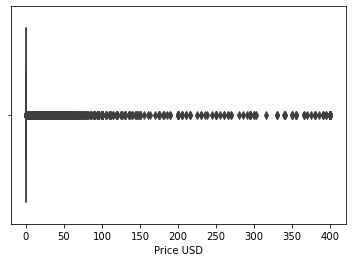

In [40]:
sns.boxplot(df["Price USD"]);

In [41]:
df[df["Price USD"]!=0.0].shape[0]

44821

In [42]:
df[df["Price USD"]==0.0].shape[0]

2245238

In [43]:
print("Percent of Paided Apps: {}".format((df[df["Price USD"]!=0.0].shape[0]/df[df["Price USD"]==0.0].shape[0])*100))

Percent of Paided Apps: 1.9962694378057027


### Tüm uygulamaların ücretli uygulamalara oranı sadece ~%2. Price USD değişkeninin etiketlerini yaparken tamamen keyfi olarak yapıcam. "Free, Easy to Access", "Accessible", "Hard to access" belirlediğim etiketler.
### The ratio of all applications to paid applications is only ~2%. I will do this completely arbitrarily when making tags for the Price USD variable. "Free, Easy to Access", "Accessible", "Hard to access" are the tags I set.

In [44]:
Price_USD_Labels=[]
for i in df["Price USD"]:
    if i==0.0:
        Price_USD_Labels.append("Free, Easy to Access")
    elif i <= 50:
        Price_USD_Labels.append("Accessible")
    else:
        Price_USD_Labels.append("Hard to access")
df["Price USD Labels"]=Price_USD_Labels
df.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price USD,Size,Developer Id,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price USD Labels
0,Gakondo,Adventure,0.0,0.0,10+,True,0.0,10M,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False,"Free, Easy to Access"
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",True,0.0,2.9M,Webserveis,Everyone,True,False,False,"Free, Easy to Access"
2,Vibook,Productivity,0.0,0.0,50+,True,0.0,3.7M,Cabin Crew,Everyone,False,False,False,"Free, Easy to Access"
3,Smart City Trichy Public Service Vehicles 17UCS548,Communication,5.0,5.0,10+,True,0.0,1.8M,Climate Smart Tech2,Everyone,True,False,False,"Free, Easy to Access"
4,GROW.me,Tools,0.0,0.0,100+,True,0.0,6.2M,Rafal Milek-Horodyski,Everyone,False,False,False,"Free, Easy to Access"


### Şimdi Size değişkenini değişken seçiminde bahsettiğim şekilde değiştiricem.
### Now I'll change the variable to the one I told you about in the variable selection.

#### M ise 1 ile, G ise 10^3 ile çarpacak ve k ise 10^3'e bölecek bir sütun oluşturucam. Ama önce Size değişkeninin içinde bulunan "Varies with device" değerini çıkartmalıyım.
#### I will create a column where M will multiply by 1, G by 10^3, and k will divide by 10^3. But first I have to subtract the value "Variables with device" from the variable you have in it.

In [45]:
df=df[~(df["Size"]=="Varies with device")]

In [46]:
size_multiplier=[]
for i in df["Size"]:
    if i.endswith("k"):
        size_multiplier.append(1/1000)
    elif i.endswith("M"):
        size_multiplier.append(1)
    elif i.endswith("G"):
        size_multiplier.append(1000)
df["Size Multiplier"]=size_multiplier
df.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price USD,Size,Developer Id,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price USD Labels,Size Multiplier
0,Gakondo,Adventure,0.0,0.0,10+,True,0.0,10M,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False,"Free, Easy to Access",1.0
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",True,0.0,2.9M,Webserveis,Everyone,True,False,False,"Free, Easy to Access",1.0
2,Vibook,Productivity,0.0,0.0,50+,True,0.0,3.7M,Cabin Crew,Everyone,False,False,False,"Free, Easy to Access",1.0
3,Smart City Trichy Public Service Vehicles 17UCS548,Communication,5.0,5.0,10+,True,0.0,1.8M,Climate Smart Tech2,Everyone,True,False,False,"Free, Easy to Access",1.0
4,GROW.me,Tools,0.0,0.0,100+,True,0.0,6.2M,Rafal Milek-Horodyski,Everyone,False,False,False,"Free, Easy to Access",1.0


In [47]:
df["Size"]=df["Size"].str.rstrip("k")
df["Size"]=df["Size"].str.rstrip("M")
df["Size"]=df["Size"].str.rstrip("G")
df["Size"]=df["Size"].astype("float64")

ValueError: could not convert string to float: '1,018'

### could not convert string to float: '1,018'. Virgüllerin yerini nokta ile değiştirmeliyiz.
### could not convert string to float: '1,018'. We need to replace commas with dots.

In [48]:
df["Size"]=df["Size"].str.replace(",",".")
df["Size"]=df["Size"].astype("float64")
df.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price USD,Size,Developer Id,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price USD Labels,Size Multiplier
0,Gakondo,Adventure,0.0,0.0,10+,True,0.0,10.0,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False,"Free, Easy to Access",1.0
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",True,0.0,2.9,Webserveis,Everyone,True,False,False,"Free, Easy to Access",1.0
2,Vibook,Productivity,0.0,0.0,50+,True,0.0,3.7,Cabin Crew,Everyone,False,False,False,"Free, Easy to Access",1.0
3,Smart City Trichy Public Service Vehicles 17UCS548,Communication,5.0,5.0,10+,True,0.0,1.8,Climate Smart Tech2,Everyone,True,False,False,"Free, Easy to Access",1.0
4,GROW.me,Tools,0.0,0.0,100+,True,0.0,6.2,Rafal Milek-Horodyski,Everyone,False,False,False,"Free, Easy to Access",1.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237011 entries, 0 to 2312943
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   Category          object 
 2   Rating            float64
 3   Rating Count      float64
 4   Installs          object 
 5   Free              bool   
 6   Price USD         float64
 7   Size              float64
 8   Developer Id      object 
 9   Content Rating    object 
 10  Ad Supported      bool   
 11  In App Purchases  bool   
 12  Editors Choice    bool   
 13  Price USD Labels  object 
 14  Size Multiplier   float64
dtypes: bool(4), float64(5), object(6)
memory usage: 213.3+ MB


In [50]:
df["Size"]=df["Size"]*df["Size Multiplier"]
df=df.drop("Size Multiplier",axis=1)
df.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price USD,Size,Developer Id,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price USD Labels
0,Gakondo,Adventure,0.0,0.0,10+,True,0.0,10.0,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False,"Free, Easy to Access"
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",True,0.0,2.9,Webserveis,Everyone,True,False,False,"Free, Easy to Access"
2,Vibook,Productivity,0.0,0.0,50+,True,0.0,3.7,Cabin Crew,Everyone,False,False,False,"Free, Easy to Access"
3,Smart City Trichy Public Service Vehicles 17UCS548,Communication,5.0,5.0,10+,True,0.0,1.8,Climate Smart Tech2,Everyone,True,False,False,"Free, Easy to Access"
4,GROW.me,Tools,0.0,0.0,100+,True,0.0,6.2,Rafal Milek-Horodyski,Everyone,False,False,False,"Free, Easy to Access"


In [51]:
df["Size"].mean()

19.201731734528945

In [52]:
df["Size"].describe()

count    2.237011e+06
mean     1.920173e+01
std      2.401531e+01
min      1.000000e-03
25%      4.900000e+00
50%      1.000000e+01
75%      2.500000e+01
max      1.500000e+03
Name: Size, dtype: float64

### np.linspace fonksiyonu ile 4 parçaya böldüm Size değişkenini. Daha sonra label'larını belirledim ve en son pd.cut fonksiyonu ile label'lara atadım.
### I have divided the size variable into 4 parts with the np.linspace function. Then I set their label and, most recently, the pd.i have assigned it to tags with an interrupt function.

In [53]:
bins=np.linspace(df["Size"].min(),df["Size"].max(),4)
bins

array([1.00000000e-03, 5.00000667e+02, 1.00000033e+03, 1.50000000e+03])

In [54]:
label_names=["Low Size","Medium Size","High Size"]
df["Size Labels"]=pd.cut(df["Size"],bins=bins,labels=label_names,include_lowest=True)
df.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price USD,Size,Developer Id,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price USD Labels,Size Labels
0,Gakondo,Adventure,0.0,0.0,10+,True,0.0,10.0,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False,"Free, Easy to Access",Low Size
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",True,0.0,2.9,Webserveis,Everyone,True,False,False,"Free, Easy to Access",Low Size
2,Vibook,Productivity,0.0,0.0,50+,True,0.0,3.7,Cabin Crew,Everyone,False,False,False,"Free, Easy to Access",Low Size
3,Smart City Trichy Public Service Vehicles 17UCS548,Communication,5.0,5.0,10+,True,0.0,1.8,Climate Smart Tech2,Everyone,True,False,False,"Free, Easy to Access",Low Size
4,GROW.me,Tools,0.0,0.0,100+,True,0.0,6.2,Rafal Milek-Horodyski,Everyone,False,False,False,"Free, Easy to Access",Low Size


In [55]:
df["Size Labels"].value_counts()

Low Size       2236876
Medium Size        125
High Size           10
Name: Size Labels, dtype: int64

### Bir de aklımdan geçen başka bir label işlemini for döngüsüyle yapmak istiyorum.
### And I want to do another label operation that I have in mind with a for loop.

In [56]:
size_labels=[]
for i in df["Size"]:
    if i <= 10:
        size_labels.append("<10 MB")
    elif i <= 100:
        size_labels.append("<100 MB")
    elif i <= 1000:
        size_labels.append("<1 GB")
    elif i >1000:
        size_labels.append(">1000 mb")
df["Size Labels"]=size_labels
df.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price USD,Size,Developer Id,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price USD Labels,Size Labels
0,Gakondo,Adventure,0.0,0.0,10+,True,0.0,10.0,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False,"Free, Easy to Access",<10 MB
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",True,0.0,2.9,Webserveis,Everyone,True,False,False,"Free, Easy to Access",<10 MB
2,Vibook,Productivity,0.0,0.0,50+,True,0.0,3.7,Cabin Crew,Everyone,False,False,False,"Free, Easy to Access",<10 MB
3,Smart City Trichy Public Service Vehicles 17UCS548,Communication,5.0,5.0,10+,True,0.0,1.8,Climate Smart Tech2,Everyone,True,False,False,"Free, Easy to Access",<10 MB
4,GROW.me,Tools,0.0,0.0,100+,True,0.0,6.2,Rafal Milek-Horodyski,Everyone,False,False,False,"Free, Easy to Access",<10 MB


In [57]:
df["Size Labels"].value_counts()

<10 MB      1137900
<100 MB     1071308
<1 GB         27793
>1000 mb         10
Name: Size Labels, dtype: int64

### Bu label'ı kullanmanın daha mantıklı olduğu kanaatindeyim. O yüzden olduğu gibi bırakıcam.
### I think it makes more sense to use this label. So you're like, I'm going to.

### Rating Count değişkeninin 0.0 değerlerini düşürüyorum.
### I am dropping the 0.0 values of the Rating Count.

In [58]:
df[df["Rating Count"]==0.0].shape

(1046271, 15)

In [59]:
df=df[~(df["Rating Count"]==0.0)]
df.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price USD,Size,Developer Id,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price USD Labels,Size Labels
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",True,0.0,2.9,Webserveis,Everyone,True,False,False,"Free, Easy to Access",<10 MB
3,Smart City Trichy Public Service Vehicles 17UCS548,Communication,5.0,5.0,10+,True,0.0,1.8,Climate Smart Tech2,Everyone,True,False,False,"Free, Easy to Access",<10 MB
6,unlimited 4G data prank free app,Libraries & Demo,4.5,12.0,"1,000+",True,0.0,2.5,android developer779,Everyone,True,False,False,"Free, Easy to Access",<10 MB
7,The Everyday Calendar,Lifestyle,2.0,39.0,500+,True,0.0,16.0,Mozaix LLC,Everyone,False,False,False,"Free, Easy to Access",<100 MB
9,Neon 3d Iron Tech Keyboard Theme,Personalization,4.7,820.0,"50,000+",True,0.0,3.5,Free 2021 Themes for Emoji keyboard,Everyone,True,False,False,"Free, Easy to Access",<10 MB


In [60]:
rating_count_labels=[]
for i in df["Rating Count"]:
    if i <=10:
        rating_count_labels.append("<10 Raters")
    elif i <=100:
        rating_count_labels.append("<100 Raters")
    elif i <=1000:
        rating_count_labels.append("<1k Raters")
    elif i <=10000:
        rating_count_labels.append("<10k Raters")
    elif i <=100000:
        rating_count_labels.append("<100k Raters")
    elif i <=1000000:
        rating_count_labels.append("<1m Raters")
    elif i>1000000:
        rating_count_labels.append(">1m Raters")
df["Rating Count Labels"]=rating_count_labels
df.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price USD,Size,Developer Id,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price USD Labels,Size Labels,Rating Count Labels
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",True,0.0,2.9,Webserveis,Everyone,True,False,False,"Free, Easy to Access",<10 MB,<100 Raters
3,Smart City Trichy Public Service Vehicles 17UCS548,Communication,5.0,5.0,10+,True,0.0,1.8,Climate Smart Tech2,Everyone,True,False,False,"Free, Easy to Access",<10 MB,<10 Raters
6,unlimited 4G data prank free app,Libraries & Demo,4.5,12.0,"1,000+",True,0.0,2.5,android developer779,Everyone,True,False,False,"Free, Easy to Access",<10 MB,<100 Raters
7,The Everyday Calendar,Lifestyle,2.0,39.0,500+,True,0.0,16.0,Mozaix LLC,Everyone,False,False,False,"Free, Easy to Access",<100 MB,<100 Raters
9,Neon 3d Iron Tech Keyboard Theme,Personalization,4.7,820.0,"50,000+",True,0.0,3.5,Free 2021 Themes for Emoji keyboard,Everyone,True,False,False,"Free, Easy to Access",<10 MB,<1k Raters


### Şimdi bir de Rating için label oluşturalım.
### Now let's create a label for the Rating.

In [61]:
rating_label=[]
for i in df["Rating"]:
    if i >= 5:
        rating_label.append("5 Stars")
    elif i >= 4:
        rating_label.append("+4 Stars")
    elif i >= 3:
        rating_label.append("+3 Stars")
    elif i >= 2:
        rating_label.append("+2 Stars")
    elif i < 2:
        rating_label.append("Less Than 2 Stars")
df["Rating Labels"]=rating_label
df.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price USD,Size,Developer Id,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price USD Labels,Size Labels,Rating Count Labels,Rating Labels
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",True,0.0,2.9,Webserveis,Everyone,True,False,False,"Free, Easy to Access",<10 MB,<100 Raters,+4 Stars
3,Smart City Trichy Public Service Vehicles 17UCS548,Communication,5.0,5.0,10+,True,0.0,1.8,Climate Smart Tech2,Everyone,True,False,False,"Free, Easy to Access",<10 MB,<10 Raters,5 Stars
6,unlimited 4G data prank free app,Libraries & Demo,4.5,12.0,"1,000+",True,0.0,2.5,android developer779,Everyone,True,False,False,"Free, Easy to Access",<10 MB,<100 Raters,+4 Stars
7,The Everyday Calendar,Lifestyle,2.0,39.0,500+,True,0.0,16.0,Mozaix LLC,Everyone,False,False,False,"Free, Easy to Access",<100 MB,<100 Raters,+2 Stars
9,Neon 3d Iron Tech Keyboard Theme,Personalization,4.7,820.0,"50,000+",True,0.0,3.5,Free 2021 Themes for Emoji keyboard,Everyone,True,False,False,"Free, Easy to Access",<10 MB,<1k Raters,+4 Stars


### Evet şimdi en güzel kısma geldik. Kontrol edelim ve çıkarım yapalım :)
### Yes, now we have come to the most beautiful part. Let's check and make inferences :)

In [62]:
# Uygunsuz-yanlış bir dtype var mı yok mu, null-nan değerler var mı yok mu öğrenmek için.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190740 entries, 1 to 2312943
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   App Name             1190740 non-null  object 
 1   Category             1190740 non-null  object 
 2   Rating               1190740 non-null  float64
 3   Rating Count         1190740 non-null  float64
 4   Installs             1190740 non-null  object 
 5   Free                 1190740 non-null  bool   
 6   Price USD            1190740 non-null  float64
 7   Size                 1190740 non-null  float64
 8   Developer Id         1190726 non-null  object 
 9   Content Rating       1190740 non-null  object 
 10  Ad Supported         1190740 non-null  bool   
 11  In App Purchases     1190740 non-null  bool   
 12  Editors Choice       1190740 non-null  bool   
 13  Price USD Labels     1190740 non-null  object 
 14  Size Labels          1190740 non-null  object 
 15

In [63]:
print(df.describe(exclude="float64").T)

                       count   unique                   top     freq
App Name             1190740  1133703           Tic Tac Toe      159
Category             1190740       48             Education   124737
Installs             1190740       20                1,000+   318225
Free                 1190740        2                  True  1167007
Developer Id         1190726   474533         Subsplash Inc     2381
Content Rating       1190740        6              Everyone  1029974
Ad Supported         1190740        2                  True   684376
In App Purchases     1190740        2                 False  1045788
Editors Choice       1190740        2                 False  1190040
Price USD Labels     1190740        3  Free, Easy to Access  1167007
Size Labels          1190740        4               <100 MB   594528
Rating Count Labels  1190740        7           <100 Raters   543350
Rating Labels        1190740        5              +4 Stars   694144


In [64]:
df.describe(include="float64").T

,count,mean,std,min,25%,50%,75%,max
Rating,1190740.0,4.102825,0.690699,1.000,3.8,4.2,4.6,5.00
Rating Count,1190740.0,3775.362814,120538.354445,5.000,11.0,34.0,168.0,56025424.00
Price USD,1190740.0,0.090747,1.868183,0.000,0.0,0.0,0.0,399.99
Size,1190740.0,20.483862,25.351207,0.001,5.1,11.0,27.0,1500.00


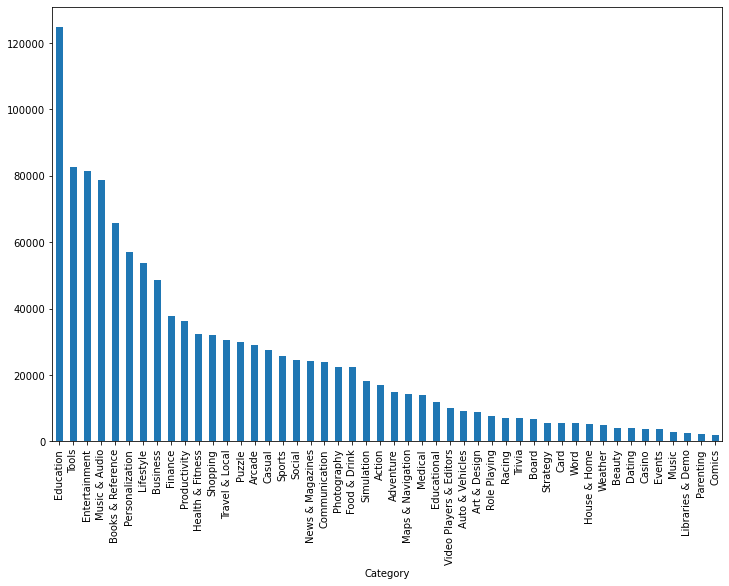

In [65]:
df.groupby("Category").size().sort_values(ascending=False).plot(kind="bar",figsize=(12,8))
plt.show()

### Farklı Category değerlerine göre Rating değerini incelemek daha mantıklı ve doğru sonuçlar vericektir. Fakat biz şuan ; 
### "Sadece Category değişkeni değil, tüm değişkenlerin hepsinin Rating değişkenine genel etkilerini merak ediyoruz." varsayımıyla ilerliyeceğiz.
### Studying the Rating value according to different Category values will give more logical and accurate results. But we now ;
### "We are interested in the general effects of all variables, not just the Category variable, but all variables on the Rating variable." we will proceed on the assumption that.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190740 entries, 1 to 2312943
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   App Name             1190740 non-null  object 
 1   Category             1190740 non-null  object 
 2   Rating               1190740 non-null  float64
 3   Rating Count         1190740 non-null  float64
 4   Installs             1190740 non-null  object 
 5   Free                 1190740 non-null  bool   
 6   Price USD            1190740 non-null  float64
 7   Size                 1190740 non-null  float64
 8   Developer Id         1190726 non-null  object 
 9   Content Rating       1190740 non-null  object 
 10  Ad Supported         1190740 non-null  bool   
 11  In App Purchases     1190740 non-null  bool   
 12  Editors Choice       1190740 non-null  bool   
 13  Price USD Labels     1190740 non-null  object 
 14  Size Labels          1190740 non-null  object 
 15

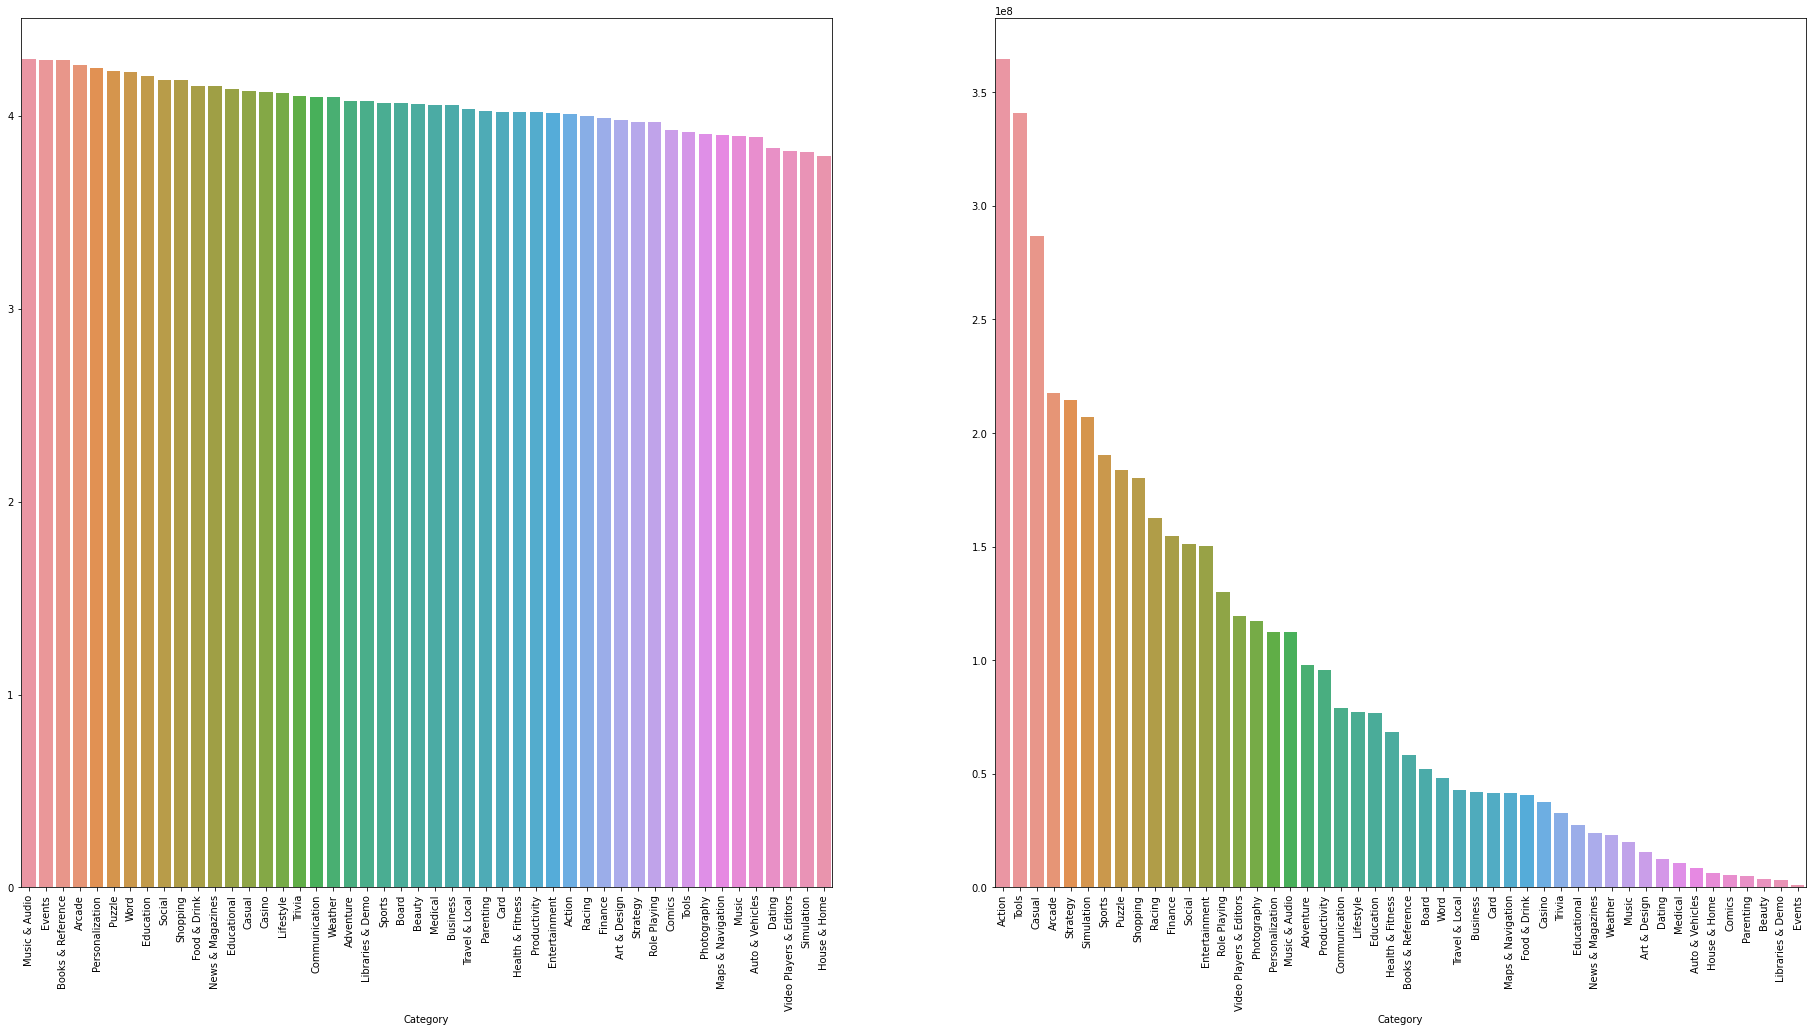

In [67]:
plt.figure(figsize=(32,16))
plt.subplot(1,2,1)
sns.barplot(x=df.groupby("Category")["Rating"].mean().sort_values(ascending=False).index
            ,y=df.groupby("Category")["Rating"].mean().sort_values(ascending=False).values)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x=df.groupby("Category")["Rating Count"].sum().sort_values(ascending=False).index
            ,y=df.groupby("Category")["Rating Count"].sum().sort_values(ascending=False).values)
plt.xticks(rotation=90)
plt.show()

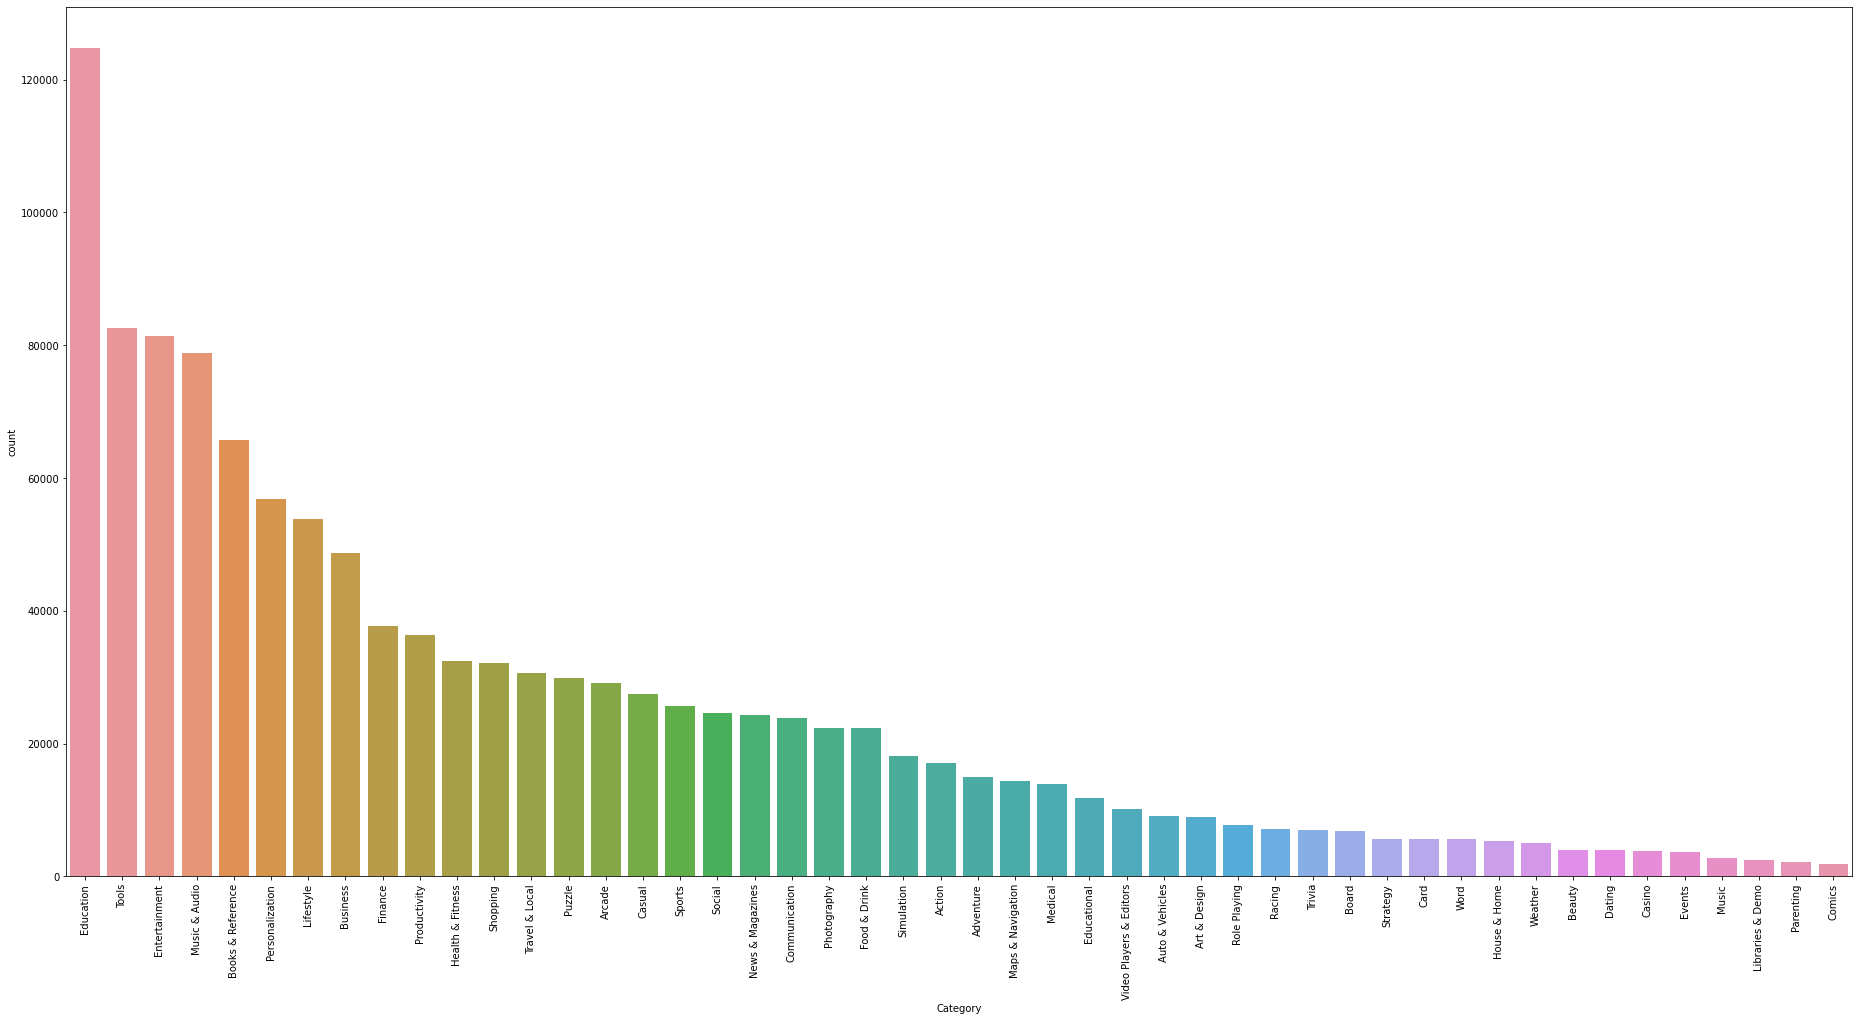

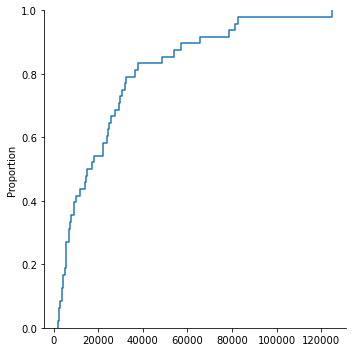

In [68]:
plt.figure(figsize=(32,16))
sns.countplot(x="Category",order=df["Category"].value_counts().index,data=df)
plt.xticks(rotation=90)
sns.displot(df.groupby("Category").size(),kind="ecdf")

In [69]:
df.groupby("Free")["Rating"].mean()

Free
False    4.145304
True     4.101961
Name: Rating, dtype: float64

In [70]:
df.groupby(["Free","Price USD Labels"])["Rating","Rating Count"].mean()

Rating  Rating Count
Free  Price USD Labels                            
False Accessible            4.144729   1052.002119
      Hard to access        4.240845    239.978873
True  Free, Easy to Access  4.101961   3830.845623

In [71]:
pd.pivot_table(df,index=["Free","Price USD Labels"],aggfunc={"Rating":np.mean
                                                            ,"Rating Count":np.sum})

Rating  Rating Count
Free  Price USD Labels                            
False Accessible            4.144729  2.481778e+07
      Hard to access        4.240845  3.407700e+04
True  Free, Easy to Access  4.101961  4.470624e+09

In [72]:
pd.pivot_table(df,index=["Free","Price USD Labels"],aggfunc={"Rating":np.mean
                                                            ,"Rating Count":np.sum})

Rating  Rating Count
Free  Price USD Labels                            
False Accessible            4.144729  2.481778e+07
      Hard to access        4.240845  3.407700e+04
True  Free, Easy to Access  4.101961  4.470624e+09

In [73]:
df["Installs"].unique()

array(['5,000+', '10+', '1,000+', '500+', '50,000+', '100+', '10,000+',
       '50+', '500,000+', '100,000+', '10,000,000+', '1,000,000+',
       '5,000,000+', '5+', '100,000,000+', '0+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '1+'], dtype=object)

In [74]:
df.groupby("Installs")["Rating"].mean().sort_values(ascending=False)

Installs
10+               4.859566
5+                4.850407
50+               4.787942
100+              4.530213
100,000,000+      4.282586
500,000,000+      4.266667
500+              4.250649
50,000,000+       4.216693
1,000,000,000+    4.212500
1+                4.200000
10,000,000+       4.174431
5,000,000+        4.112893
1,000+            4.057501
1,000,000+        4.043409
500,000+          4.002062
0+                3.990210
5,000+            3.980880
100,000+          3.957791
10,000+           3.955824
50,000+           3.944621
Name: Rating, dtype: float64

In [75]:
df.groupby("Editors Choice")["Rating"].mean()

Editors Choice
False    4.102690
True     4.332429
Name: Rating, dtype: float64

In [76]:
df.groupby("Content Rating")["Rating"].mean().sort_values(ascending=False)

Content Rating
Teen               4.118345
Everyone           4.104088
Everyone 10+       4.082277
Mature 17+         4.033856
Adults only 18+    3.917857
Unrated            3.772951
Name: Rating, dtype: float64

In [77]:
df.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price USD,Size,Developer Id,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price USD Labels,Size Labels,Rating Count Labels,Rating Labels
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",True,0.0,2.9,Webserveis,Everyone,True,False,False,"Free, Easy to Access",<10 MB,<100 Raters,+4 Stars
3,Smart City Trichy Public Service Vehicles 17UCS548,Communication,5.0,5.0,10+,True,0.0,1.8,Climate Smart Tech2,Everyone,True,False,False,"Free, Easy to Access",<10 MB,<10 Raters,5 Stars
6,unlimited 4G data prank free app,Libraries & Demo,4.5,12.0,"1,000+",True,0.0,2.5,android developer779,Everyone,True,False,False,"Free, Easy to Access",<10 MB,<100 Raters,+4 Stars
7,The Everyday Calendar,Lifestyle,2.0,39.0,500+,True,0.0,16.0,Mozaix LLC,Everyone,False,False,False,"Free, Easy to Access",<100 MB,<100 Raters,+2 Stars
9,Neon 3d Iron Tech Keyboard Theme,Personalization,4.7,820.0,"50,000+",True,0.0,3.5,Free 2021 Themes for Emoji keyboard,Everyone,True,False,False,"Free, Easy to Access",<10 MB,<1k Raters,+4 Stars


In [78]:
df.groupby("Rating Count Labels")["Rating"].mean().sort_values(ascending=False)

Rating Count Labels
>1m Raters      4.367876
<1m Raters      4.297103
<10 Raters      4.187923
<100k Raters    4.176768
<100 Raters     4.112729
<10k Raters     4.049915
<1k Raters      3.997511
Name: Rating, dtype: float64

In [79]:
df.groupby(["Rating Labels","Size Labels"]).size()

Rating Labels      Size Labels
+2 Stars           <1 GB             827
                   <10 MB          34437
                   <100 MB         35545
+3 Stars           <1 GB            3766
                   <10 MB         153092
                   <100 MB        157550
+4 Stars           <1 GB            9276
                   <10 MB         338406
                   <100 MB        346453
                   >1000 mb            9
5 Stars            <1 GB             879
                   <10 MB          48977
                   <100 MB         48525
Less Than 2 Stars  <1 GB             129
                   <10 MB           6414
                   <100 MB          6455
dtype: int64

In [80]:
df.groupby(["Price USD Labels","Rating Labels"]).size()

Price USD Labels      Rating Labels    
Accessible            +2 Stars               1032
                      +3 Stars               5743
                      +4 Stars              15622
                      5 Stars                 992
                      Less Than 2 Stars       202
Free, Easy to Access  +2 Stars              69774
                      +3 Stars             308634
                      +4 Stars             678425
                      5 Stars               97379
                      Less Than 2 Stars     12795
Hard to access        +2 Stars                  3
                      +3 Stars                 31
                      +4 Stars                 97
                      5 Stars                  10
                      Less Than 2 Stars         1
dtype: int64

In [81]:
df.groupby(["Price USD Labels","In App Purchases"]).size()

Price USD Labels      In App Purchases
Accessible            False                 21174
                      True                   2417
Free, Easy to Access  False               1024493
                      True                 142514
Hard to access        False                   121
                      True                     21
dtype: int64

In [82]:
df.groupby(["Price USD Labels","In App Purchases"])["Rating"].mean()

Price USD Labels      In App Purchases
Accessible            False               4.142127
                      True                4.167522
Free, Easy to Access  False               4.106100
                      True                4.072205
Hard to access        False               4.261983
                      True                4.119048
Name: Rating, dtype: float64

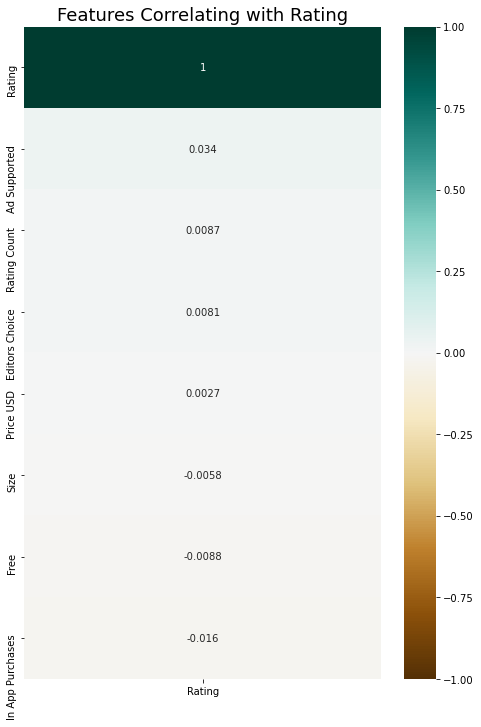

In [83]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[["Rating"]].sort_values(by="Rating",ascending=False),vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title("Features Correlating with Rating"
                  ,fontdict={"fontsize":18});

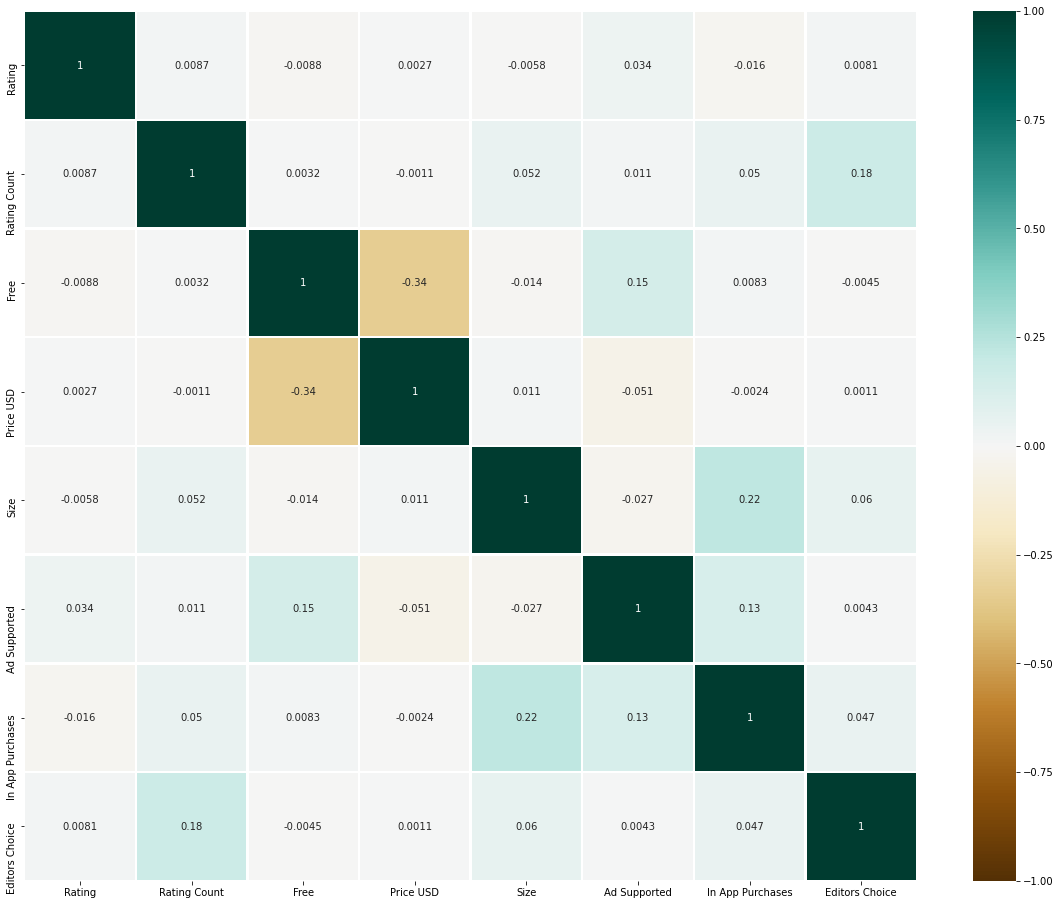

In [84]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True,linewidths=1.5,vmax=1,vmin=-1,cmap="BrBG")
plt.show()

### EDA ve preprocess adımları bitti. Sırada Tableau'da oluşturulacak bir dashboard var.
## The #EDA and preprocess steps are finished. Next up is a dashboard to be created in Tableau.

In [85]:
df.to_csv("google_play_apps.csv")